# import

In [1]:
import os
import sys
import glob
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl

In [2]:
from config import *

sys.path.append(os.path.normpath('../../src'))
from experiment import AGG
from util import fix_plot

In [3]:
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = '\\usepackage{sansmath}\n\\sansmath'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

# Results for paper

In [4]:
SAVE_TO_FILE = False
SAVE_EXT = '.eps'

In [5]:
detector = 'lcode_wd'
dataset = 'Anuran_Calls'
metric = 'mcc'
agg = AGG(SAVE_DATA_DIR, dataset, detector)
df = agg.results
df['dataset'] = dataset
df['method'] = detector

In [6]:
def plt_parameter_dependency(df_base, metric, how_feature, save_path=None):
    df = df_base[df_base['how_feature'] == how_feature]
    score = df.groupby(by=['alpha', 'gamma']).mean()[[metric]].unstack().droplevel(0, axis=1).T
    nod = df.groupby(by=['alpha', 'gamma']).mean()[['num_of_detection']].unstack().droplevel(0, axis=1).T
    if how_feature == 'relevant':
        nod = nod -1

    fig, axes = plt.subplots(1, 2, figsize=(7.5, 3))
    axes[0] = sns.heatmap(score, lw=1, ax=axes[0], vmin=0.6, vmax=0.9, cmap=sns.cm.rocket._resample(6))
    axes[0].set_title('Classification score')
    axes[1] = sns.heatmap(nod, lw=1, ax=axes[1], vmin=0, vmax=3, cmap=sns.cm.rocket_r._resample(6))
    axes[1].set_title('\# of false alarm')

    for ax in axes:
        ax.invert_yaxis()

    plt.xticks(rotation=0)
    plt.yticks(rotation=0)
    fix_plot(plt, True, None, None, SAVE_TO_FILE, save_path, SAVE_EXT)
    return nod, score

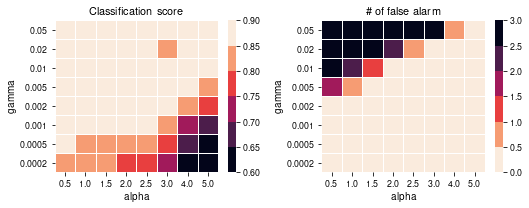

In [7]:
how_feature = 'relevant'
save_path = os.path.join(OUTPUT_DIR, 'prm_%s' % how_feature)
nod, score = plt_parameter_dependency(df, metric, how_feature, save_path=save_path)

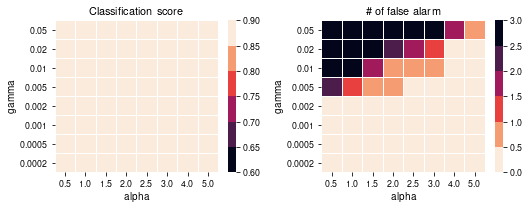

In [8]:
how_feature = 'irrelevant'
save_path = os.path.join(OUTPUT_DIR, 'prm_%s' % how_feature)
nod, score = plt_parameter_dependency(df, metric, how_feature, save_path=save_path)